#### 
Here I convert ligand smile strings to vectors using the rdkit module

In [1]:
#import sys
#!{sys.executable} -m pip install rdkit

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [2]:
df = pd.read_csv('prot_lig_aff.csv')
df

,protein_seq,ligand_cid,kd,ligand_smile
0,MVRSVAWAGFMVLLMIPWGSAAKLVCYFTNWAQYRQGEARFLPKDL...,46511426.0,0.0,C1=CC=C(C(=C1)C#N)C2=CC=C(C=C2)COC(=O)CN3C(=O)...
1,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0,C1=CC=C(C(=C1)C#N)C2=CC=C(C=C2)COC(=O)CN3C(=O)...
2,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0,C1=CC=C(C(=C1)C#N)C2=CC=C(C=C2)COC(=O)CN3C(=O)...
3,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0,C1=CC=C(C(=C1)C#N)C2=CC=C(C=C2)COC(=O)CN3C(=O)...
4,MRFATSTIVK VALLLSSLCV DAAVMWNRDT SSTDLEARAS SG...,46511426.0,0.0,C1=CC=C(C(=C1)C#N)C2=CC=C(C=C2)COC(=O)CN3C(=O)...
...,...,...,...,...
21874,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,104037439.0,0.0,CC1=NC(=NC=C1)SC2=CC(=NC=C2)NC
21875,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103967460.0,0.0,CC1(CC(CC(C1)(C)C)N2C=CNC2=S)C
21876,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103967468.0,0.0,CC1(CC(CC(C1)(C)C)N2C(=NNC2=S)C3=CC=CS3)C
21877,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,103970006.0,0.0,C1CCC(CC1)(CNS(=O)(=O)C2=CNN=C2)CBr


In [3]:
def smile_to_vec(smiles_string):
    # choose 200 molecular descriptors
    chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']
    mol = Chem.MolFromSmiles(smiles_string)
    mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
    list_of_descriptor_vals = list(mol_descriptor_calculator.CalcDescriptors(mol))
    return list_of_descriptor_vals

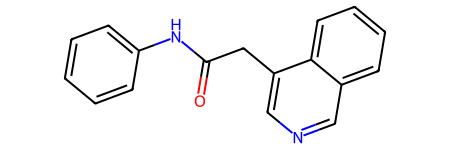

In [4]:
# define SMILES string of molecule
smiles_string = "O=C(Cc1cncc2ccccc12)Nc1ccccc1"
# convert SMILES string to RDKit mol object
mol = Chem.MolFromSmiles(smiles_string)
mol
#smile_to_vec(smiles_string)

In [5]:
X = df["ligand_smile"]
#len(smile_to_vec(X[0]))
col_list = ['ligand_vec{}'.format(i) for i in range(200)]
ans_df = pd.DataFrame(columns = col_list)
#ans_df

In [6]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='rdkit')

In [7]:
for smile_str in X:
    try:
        lig_vec = smile_to_vec(smile_str)
        #print(lig_vec)
    except:
        lig_vec = [np.nan]*200
    ans_df.loc[ans_df.shape[0]] = lig_vec
    
ans_df

[23:39:30] WARNING: not removing hydrogen atom without neighbors
[23:39:31] WARNING: not removing hydrogen atom without neighbors
[23:39:31] WARNING: not removing hydrogen atom without neighbors
[23:39:31] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:33] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not removing hydrogen atom without neighbors
[23:39:34] WARNING: not r

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 24, in _CountMatches
    return len(mol.GetSubstructMatches(patt, uniquify=unique))
AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMat

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 463, in BalabanJ
    dMat = mol._balabanMat
AttributeError: 'NoneType' object has no attribute '_balabanMat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 466, in BalabanJ
    dMat = Chem.GetDistanceMatrix(mol, useBO=1, useAtomWts=0, force=0, prefix="Balaban")
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.GetDistanceMatrix(NoneType)
did not match C++ signature:
    GetDistanceMatrix(class RDKit::ROMol {lvalue} mol, bool useBO=False, bool useAtomWts=False, bool force=False, char const * __ptr64 prefix='')
Traceback (most r

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAliphaticHeterocycles(NoneType)
did not match C++ signature:
    CalcNumAliphaticHeterocycles(class RDKit::ROMol mol)
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAliphaticRings(NoneType)
did not match C++ s

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Lipinski.py", line 68, in <lambda>
    NHOHCount = lambda x: rdMolDescriptors.CalcNumLipinskiHBD(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumLipinskiHBD(NoneType)
did not match C++ signature:
    CalcNumLipinskiHBD(class RDKit::ROMol mol)
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Lipinski.py", line 65, in <lambda>
    NOCount = lambda x: rdMolDescriptors.CalcNumLipinskiHBA(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumLi

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 24, in _CountMatches
    return len(mol.GetSubstructMatches(patt, uniquify=unique))
AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMat

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 24, in _CountMatches
    return len(mol.GetSubstructMatches(patt, uniquify=unique))
AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMat

[23:47:12] Explicit valence for atom # 1 Br, 3, is greater than permitted
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 463, in BalabanJ
    dMat = mol._balabanMat
AttributeError: 'NoneType' object has no attribute '_balabanMat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 466, in BalabanJ
    dMat = Chem.GetDistanceMatrix(mol, useBO=1, useAtomWts=0, force=0, prefix="Balaban")
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.GetDistanceMatrix(NoneType)
did not match C++ signature:
    GetDistanceMatrix(class RDKit::ROMol {lvalue} mol, bool useBO=False, bool useAtomWts=

[23:47:12] Explicit valence for atom # 1 Br, 3, is greater than permitted
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 463, in BalabanJ
    dMat = mol._balabanMat
AttributeError: 'NoneType' object has no attribute '_balabanMat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\GraphDescriptors.py", line 466, in BalabanJ
    dMat = Chem.GetDistanceMatrix(mol, useBO=1, useAtomWts=0, force=0, prefix="Balaban")
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.GetDistanceMatrix(NoneType)
did not match C++ signature:
    GetDistanceMatrix(class RDKit::ROMol {lvalue} mol, bool useBO=False, bool useAtomWts=

Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 24, in _CountMatches
    return len(mol.GetSubstructMatches(patt, uniquify=unique))
AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'
Traceback (most recent call last):
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\sbnad\Anaconda3\envs\tf\lib\site-packages\rdkit\Chem\Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMat

,ligand_vec0,ligand_vec1,ligand_vec2,ligand_vec3,ligand_vec4,ligand_vec5,ligand_vec6,ligand_vec7,ligand_vec8,ligand_vec9,...,ligand_vec190,ligand_vec191,ligand_vec192,ligand_vec193,ligand_vec194,ligand_vec195,ligand_vec196,ligand_vec197,ligand_vec198,ligand_vec199
0,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486042
1,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486042
2,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486042
3,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486042
4,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,2.198041,486.915708,11.380469,9.136640,9.953137,7.775188,4.890440,5.706937,3.209443,4.250120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.823284
21875,2.299660,409.141036,11.974691,10.708833,11.525330,7.291224,6.046847,6.455096,6.739774,7.126472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722469
21876,2.045164,660.695584,15.250712,13.141645,14.774638,9.774387,7.482629,8.770530,7.766945,9.101338,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.746495
21877,2.017823,466.487582,13.062632,10.154371,12.556864,8.580045,6.124441,8.729073,4.952847,7.280534,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.808210


In [8]:
ans_df.to_csv('ligand_vecs.csv', index = False)

In [9]:
ans_df.isnull().sum()

ligand_vec0      10425
ligand_vec1      10425
ligand_vec2      10425
ligand_vec3      10425
ligand_vec4      10425
                 ...  
ligand_vec195    10425
ligand_vec196    10425
ligand_vec197    10425
ligand_vec198    10425
ligand_vec199    10425
Length: 200, dtype: int64

In [12]:
ans_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21879 entries, 0 to 21878
Columns: 200 entries, ligand_vec0 to ligand_vec199
dtypes: float64(200)
memory usage: 33.6 MB
